In [1]:
from dolfin import *

In [14]:
# Constants
ys = 1
t = 0
dt = 0.01
T = 1 
rho1 = 1
rho2 = 10
mu1 = 1
mu2 = 0
lamda1 = 1
lamda2 = 1

In [15]:
# Mesh, functionspace, functions
mesh = RectangleMesh(Point(0,0), Point(2,2),20,20)

Vout = df.FunctionSpace(mesh_out, 'CG', 1, constrained_domain=PeriodicBoundary1D())

V = VectorFunctionSpace(mesh, "CG", 1)
D = VectorFunctionSpace(mesh, "DG", 0)
u = TrialFunction(V)
v = TestFunction(V)

In [16]:
D = FunctionSpace(mesh, "DG", 0)

# Define variable constants
rhof = Expression("x[1] > ys ? rho1 : rho2",
                  ys=ys,rho1=rho1,rho2=rho2,degree=2)
muf = Expression("x[1] > ys ? mu1 : mu2",
                 ys=ys,mu1=mu1,mu2=mu2,degree=2)
lamdaf = Expression("x[1] > ys ? lamda1 : lamda2",
                    ys=ys,lamda1=lamda1,lamda2=lamda2,degree=2)

rho = interpolate(rhof, D)
mu = interpolate(muf, D)
lamda = interpolate(lamdaf, D)

In [5]:
# Stress tensor
def sigma(u, lamda, mu):
    return lamda*div(u)*Identity(2) + mu*(grad(u) + grad(u).T)

In [6]:
# Initial conditions
Ixy = Constant((1,0))
Vxy = Constant((2,0))
u2 = interpolate(Ixy, V)
u1 = interpolate(Vxy, V)

In [7]:
# Variational forms
F = inner(u,v)*dx - 2*inner(u1,v)*dx + inner(u2,v)*dx + \
    Constant(dt)**2/rho*inner(sigma(u1,lamda,mu),grad(v))*dx

0.02


NameError: name 'Vout' is not defined

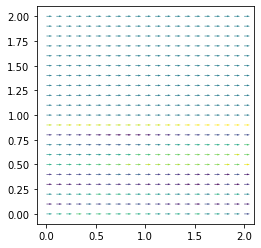

In [17]:
t = 2*dt
left = assemble(lhs(F))
u = Function(V)

# Time stepping
while t < T:
    print(t/T)
    plot(u2, rescale=False)
    right = assemble(rhs(F))
    begin("solving at time step t=%g" % t)
    solve(left, u.vector(), right)
    end()

    u2.assign(u1)
    u1.assign(u)
    
    u_save = []
    u_out = project(u2, Vout)
    u_out_vertex = u_out.compute_vertex_values(mesh_out)
    u_save.append(u_out_vertex)
    t += dt

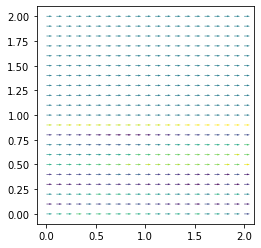

In [13]:
plot(u)